## 1. Data Collection and Preprocessing
----

### **Step 1: Import Libraries**


In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib

from sklearn.pipeline import Pipeline


---
### **Step 2: Initial Data Exploration**

1. **Load and Inspect the Data**:
   - Load the Iris dataset and display basic information to get an overview.

   ```python
   import pandas as pd
   data = pd.read_csv('path_to_iris_dataset.csv')
   data.head()
   data.info()
   data.describe()
   ```

2. **Explore the Features and Target Classes**:
   - The Iris dataset has four features (sepal length, sepal width, petal length, petal width) and a target column (`Species`).
   - Check unique values in the target column to see the classes (`setosa`, `versicolor`, `virginica`).

   ```python
   print(data['Species'].unique())
   ```

3. **Visualize Relationships**:
   - Plot feature distributions by species using pair plots to see how the features relate to each other and the target.

   ```python
   import seaborn as sns
   import matplotlib.pyplot as plt

   sns.pairplot(data, hue="Species", markers=["o", "s", "D"])
   plt.show()
   ```

   This visualization will reveal which features are more separable among species.
   

In [6]:
mnist_data = pd.read_csv('../data/mnist_train.csv')
iris_data = pd.read_csv('../data/Iris.csv')

In [7]:
mnist_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
iris_data.shape

(150, 7)

In [12]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [17]:
print(iris_data['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


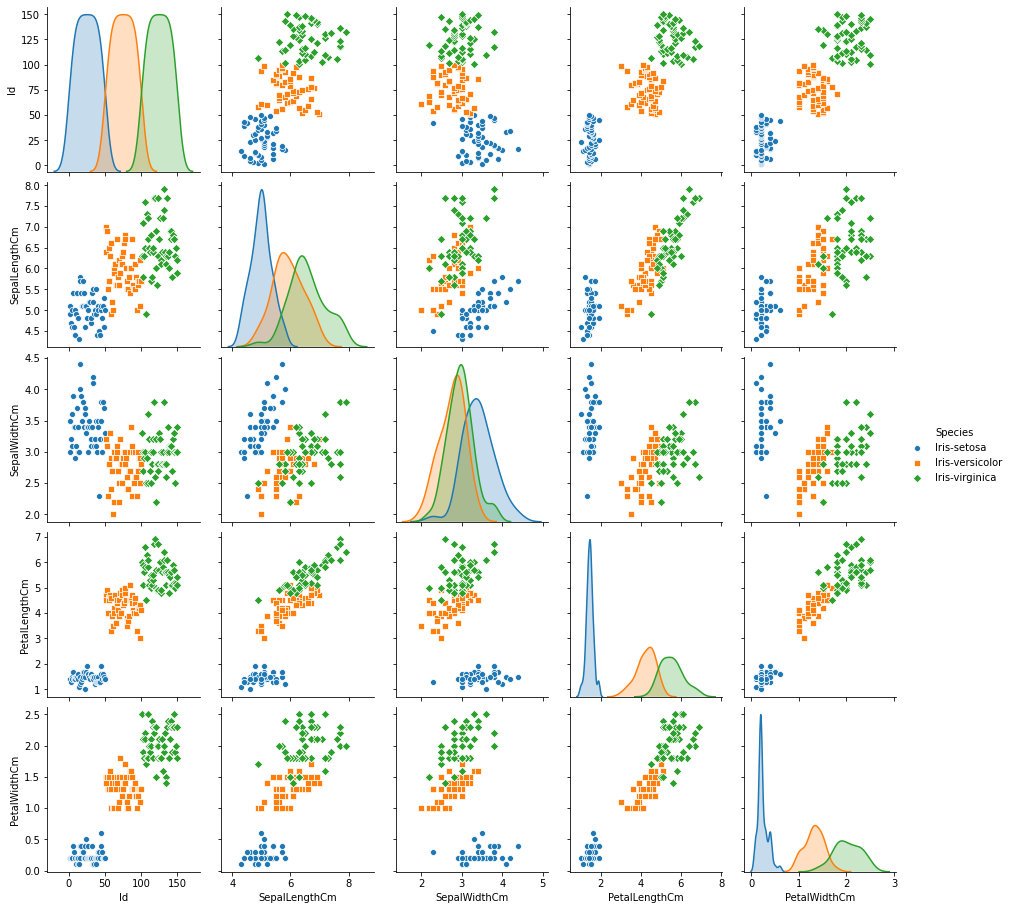

In [19]:
sns.pairplot(iris_data, hue="Species", markers=["o", "s", "D"])
plt.show()

---

### **Step 3: Data Preprocessing**

1. **Handle Missing Values** (if any):
   - Although the Iris dataset is generally clean, it’s good to check for missing values just in case.

   ```python
   print(data.isnull().sum())
   ```

2. **Encode the Target Column**:
   - Convert the `Species` column to numerical values to use in model training.

   ```python
   from sklearn.preprocessing import LabelEncoder

   encoder = LabelEncoder()
   data['species_encoded'] = encoder.fit_transform(data['Species'])
   ```

3. **Feature Scaling**:
   - Standardize features to make the model training smoother. Here, you can apply `StandardScaler` to `sepal_length`, `sepal_width`, `petal_length`, and `petal_width`.

   ```python
   from sklearn.preprocessing import StandardScaler

   scaler = StandardScaler()
   features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
   data[features] = scaler.fit_transform(data[features])
   ```

In [20]:
print(iris_data.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [21]:
encoder = LabelEncoder()
iris_data['species_encoded'] = encoder.fit_transform(iris_data['Species'])

In [31]:
print(iris_data['species_encoded'].unique())

[0 1 2]


In [33]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'species_encoded'],
      dtype='object')

In [34]:
scaler = StandardScaler()
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
iris_data[features] = scaler.fit_transform(iris_data[features])

In [35]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_encoded
0,1,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa,0
1,2,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa,0
2,3,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa,0
3,4,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa,0
4,5,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa,0


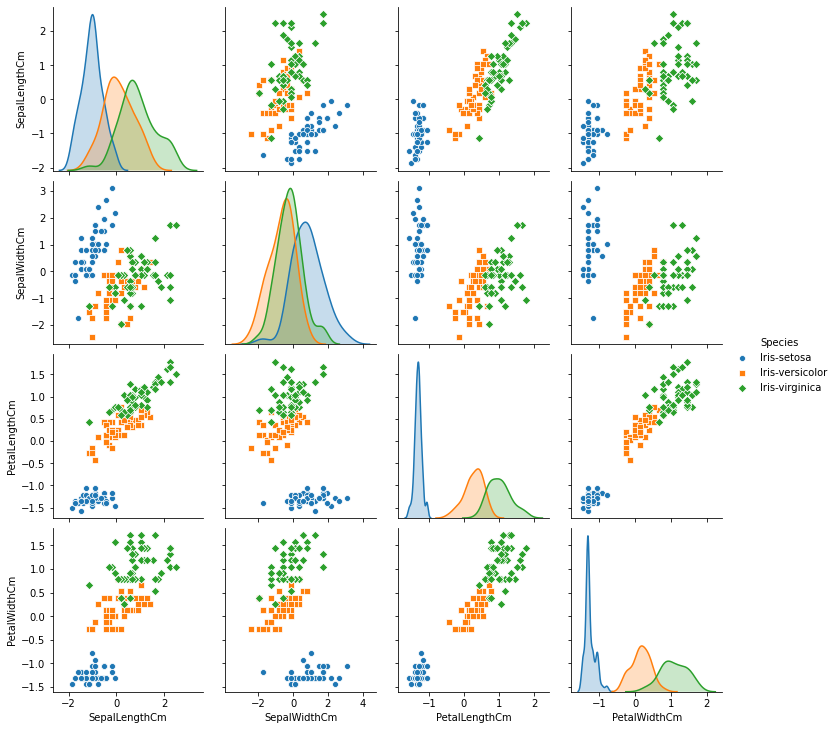

In [38]:
sns.pairplot(iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']], hue="Species", markers=["o", "s", "D"])
plt.show()

---

### **Step 4: Split the Data into Train/Test Sets**

1. **Separate Features and Labels**:
   - Split the dataset into the input features and the target labels.

   ```python
   X = data[features]
   y = data['species_encoded']
   ```

2. **Create Train and Test Sets**:
   - Use an 80-20 split to have enough data for training and still leave some for testing.

   ```python
   from sklearn.model_selection import train_test_split

   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
   ```

   Using `stratify=y` helps ensure each species is proportionately represented in both sets.

With these steps, you’ll have your data prepared and ready to move on to model training in Week 2. 

In [39]:
X = iris_data[features]
y = iris_data['species_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

----
<br><br><br><br><br><br>
## 2. Model Building, Training & Evaluation
----

For **Week 2**, the focus is on building, training, and evaluating models on the Iris dataset. Here’s a breakdown with specific steps and relevant code examples:

---

### **Step 1: Model Selection**

1. **Choose Algorithms to Compare**:
   - Start with simple algorithms such as **Logistic Regression** and **k-Nearest Neighbors (k-NN)**, then move to slightly more complex models like **Decision Trees** and **Support Vector Machines (SVM)**.
   - This variety will help demonstrate the strengths of each algorithm on a small, well-separated dataset like Iris.

---

### **Step 2: Model Training**

1. **Define and Train Models**:
   - Set up each model and train it using `X_train` and `y_train`.

   ```python
   from sklearn.linear_model import LogisticRegression
   from sklearn.neighbors import KNeighborsClassifier
   from sklearn.tree import DecisionTreeClassifier
   from sklearn.svm import SVC

   # Initialize models
   models = {
       "Logistic Regression": LogisticRegression(),
       "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
       "Decision Tree": DecisionTreeClassifier(),
       "SVM": SVC()
   }

   # Train each model
   for model_name, model in models.items():
       model.fit(X_train, y_train)
       print(f"{model_name} trained successfully.")
   ```

In [41]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

# Train each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{model_name} trained successfully.")

Logistic Regression trained successfully.
k-Nearest Neighbors trained successfully.
Decision Tree trained successfully.
SVM trained successfully.


---

### **Step 3: Model Evaluation**

1. **Evaluate Models on Test Data**:
   - Calculate accuracy and other metrics like precision, recall, and F1-score to see how well each model performs on `X_test`.

   ```python
   from sklearn.metrics import accuracy_score, classification_report

   for model_name, model in models.items():
       y_pred = model.predict(X_test)
       print(f"Model: {model_name}")
       print("Accuracy:", accuracy_score(y_test, y_pred))
       print("Classification Report:\n", classification_report(y_test, y_pred))
       print("\n" + "-"*50 + "\n")
   ```

2. **Confusion Matrix**:
   - Plot a confusion matrix to visually understand misclassifications and overall model performance.

   ```python
   from sklearn.metrics import confusion_matrix
   import seaborn as sns
   import matplotlib.pyplot as plt

   for model_name, model in models.items():
       y_pred = model.predict(X_test)
       cm = confusion_matrix(y_test, y_pred)
       sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
       plt.title(f"Confusion Matrix for {model_name}")
       plt.xlabel('Predicted')
       plt.ylabel('Actual')
       plt.show()
   ```

In [47]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print("Accuracy: {:.3f}%".format(accuracy_score(y_test, y_pred) * 100))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n" + "-"*50 + "\n")

Model: Logistic Regression
Accuracy: 93.333%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


--------------------------------------------------

Model: k-Nearest Neighbors
Accuracy: 93.333%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


----------------------------------------------

In [ ]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


---

### **Step 4: Hyperparameter Tuning**

1. **Tune Hyperparameters with Grid Search**:
   - Use `GridSearchCV` to find optimal hyperparameters for at least one model, like `k-NN` or `SVM`.

   ```python
   from sklearn.model_selection import GridSearchCV

   # Example for k-NN
   knn = KNeighborsClassifier()
   param_grid = {'n_neighbors': [3, 5, 7, 9]}
   grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
   grid_search.fit(X_train, y_train)

   print("Best Parameters for k-NN:", grid_search.best_params_)
   print("Best Score for k-NN:", grid_search.best_score_)
   ```

2. **Retrain and Evaluate**:
   - Using the best parameters from `GridSearchCV`, retrain the model and evaluate it again to see if performance improves.

In [49]:
# Example for k-NN
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters for k-NN:", grid_search.best_params_)
print("Best Score for k-NN:", grid_search.best_score_)

Best Parameters for k-NN: {'n_neighbors': 9}
Best Score for k-NN: 0.9583333333333334


---

### **Step 5: Model Selection Summary**

1. **Compare and Select Best Model**:
   - Summarize the performance metrics (accuracy, precision, recall, F1-score) of each model in a table for easy comparison.
   - Document why you choose the final model based on performance, interpretability, or efficiency.

2. **Save the Final Model**:
   - Save the chosen model using `joblib` or `pickle` for future deployment.

   ```python
   import joblib
   final_model = grid_search.best_estimator_  # Use the tuned model
   joblib.dump(final_model, 'final_iris_model.pkl')
   ```

---

With this workflow, you’ll have a trained and well-evaluated model ready for deployment. 

In [51]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=9)

---
**SVM** is preferred to **KNN** $\textbf{(K = 9)}$ because of a higher accuracy score ($\textbf{96.67%}$ vs $\textbf{95.83%}$).

---

In [53]:
final_model = SVC  # Use the tuned model
joblib.dump(final_model, '../models/final_iris_SVM_model.pkl')

['../models/final_iris_SVM_model.pkl']

----
<br><br><br><br><br><br>
## 3. ML Pipeline Creation
----

In **Week 3**, the focus is on creating a basic ML pipeline that automates data processing, model training, and evaluation. This will make your model more reproducible and easy to maintain. Here’s a breakdown:

---

### **Step 1: Define Pipeline Stages**

1. **Identify Steps to Include in the Pipeline**:
   - For the Iris model, the pipeline should have:
     - **Data Preprocessing**: Scaling and encoding
     - **Model Training**: Training the chosen algorithm (e.g., k-NN, SVM, or the best-performing model from Week 2)
     - **Evaluation**: Measuring performance (accuracy, confusion matrix)

2. **Use Scikit-Learn’s Pipeline**:
   - `Pipeline` from Scikit-Learn lets you streamline these stages into a single workflow.

---

### **Step 2: Implement the Pipeline**

1. **Setup Preprocessing and Modeling Steps**:
   - Define your data transformations and model in a `Pipeline`. Here’s an example using a `StandardScaler` for scaling and a k-NN classifier.

   ```python
   from sklearn.pipeline import Pipeline
   from sklearn.preprocessing import StandardScaler
   from sklearn.neighbors import KNeighborsClassifier

   # Pipeline definition
   pipeline = Pipeline([
       ('scaler', StandardScaler()),
       ('classifier', KNeighborsClassifier(n_neighbors=3))
   ])
   ```

2. **Train the Pipeline**:
   - Fit the pipeline on `X_train` and `y_train`. This step will apply the scaler and train the model in one command.

   ```python
   pipeline.fit(X_train, y_train)
   ```

In [57]:
# Pipeline definition
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])

---

### **Step 3: Evaluate the Pipeline**

1. **Predict on Test Data**:
   - Use the pipeline to make predictions on `X_test` and evaluate its performance.

   ```python
   from sklearn.metrics import accuracy_score, classification_report

   y_pred = pipeline.predict(X_test)
   print("Accuracy:", accuracy_score(y_test, y_pred))
   print("Classification Report:\n", classification_report(y_test, y_pred))
   ```

2. **Visualize the Confusion Matrix**:
   - To understand performance better, plot a confusion matrix for the pipeline’s predictions.

   ```python
   from sklearn.metrics import confusion_matrix
   import seaborn as sns
   import matplotlib.pyplot as plt

   cm = confusion_matrix(y_test, y_pred)
   sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
   plt.title("Confusion Matrix")
   plt.xlabel("Predicted Labels")
   plt.ylabel("True Labels")
   plt.show()
   ```

In [58]:
y_pred = pipeline.predict(X_test)
print("Accuracy: {:.3f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 96.667%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



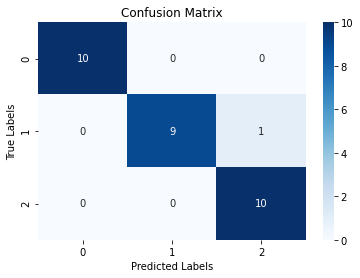

In [59]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

---

### **Step 4: Hyperparameter Tuning within Pipeline**

1. **Use Grid Search on the Pipeline**:
   - You can perform hyperparameter tuning using `GridSearchCV` directly on the pipeline to ensure that all steps are optimized together.

   ```python
   from sklearn.model_selection import GridSearchCV

   param_grid = {
       'classifier__n_neighbors': [3, 5, 7],
       'classifier__weights': ['uniform', 'distance']
   }

   grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
   grid_search.fit(X_train, y_train)

   print("Best Parameters:", grid_search.best_params_)
   print("Best Score:", grid_search.best_score_)
   ```

2. **Save the Tuned Pipeline**:
   - Once you have the best parameters, save the entire pipeline as a model object for later use.

   ```python
   import joblib
   joblib.dump(grid_search.best_estimator_, 'models/final_iris_pipeline.pkl')
   ```

In [60]:
# Pipeline definition
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])

pipeline2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [61]:
y_pred2 = pipeline2.predict(X_test)
print("Accuracy: {:.3f}%".format(accuracy_score(y_test, y_pred2) * 100))
print("Classification Report:\n", classification_report(y_test, y_pred2))

Accuracy: 93.333%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [66]:
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(pipeline2, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Pipeline:", grid_search.best_estimator_)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Pipeline: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier())])
Best Parameters: {'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}
Best Score: 0.9666666666666668


In [68]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])

In [69]:
joblib.dump(pipeline, '../models/final_iris_SVC_pipeline.pkl')

['../models/final_iris_SVC_pipeline.pkl']

---

### **Step 5: Document Pipeline Workflow**

1. **Write a Summary in Your Notebook**:
   - Document each step of the pipeline with comments explaining the preprocessing, model choice, and evaluation results.

2. **Prepare for Deployment (Optional)**:
   - For deployment, you might add steps to preprocess new data and load the saved pipeline model, making it ready for real-world usage.

---

By the end of Week 3, you’ll have a functional ML pipeline that automates data processing, training, and evaluation, making the model reproducible and deployment-ready. 

### Step 5, No. 2 Details

For **deployment**, you'll need to prepare your model for real-world use by automating the process of loading the saved model, processing new input data, and making predictions. Here's a general approach to ensure your pipeline is deployment-ready.

### **Steps to Prepare the Model for Deployment**

1. **Save the Pipeline Model** (Already done)
   - You've already saved your pipeline model in Week 3 with:
   
     ```python
     joblib.dump(pipeline, 'models/final_iris_pipeline.pkl')
     ```

2. **Create a New Python Script for Deployment**:
   - A deployment script is where you'll load the model and define functions to preprocess new data and make predictions. This script will be used to deploy the model in a production environment.

   **Example Deployment Script**:
   
   ```python
   import joblib
   import numpy as np
   import pandas as pd
   from sklearn.preprocessing import StandardScaler

   # Load the pre-trained pipeline model
   model = joblib.load('models/final_iris_pipeline.pkl')

   # Function to preprocess new data and predict
   def predict_new_data(input_data):
       # input_data should be a pandas DataFrame or numpy array
       # Ensure the input data is in the same format as the training data
       # Example: input_data should have the same number of columns as the training features

       # Predict using the pipeline (scaling + model inference is done automatically)
       prediction = model.predict(input_data)
       return prediction

   # Example of new input data (you can replace this with new data)
   new_data = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example: Single row of new Iris flower data
   
   # Convert to pandas DataFrame if necessary (match column names)
   new_data_df = pd.DataFrame(new_data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

   # Get the prediction
   prediction = predict_new_data(new_data_df)
   print(f"Predicted class: {prediction}")
   ```

   - **Loading the Model**: You load the model using `joblib.load()`, which restores the trained pipeline with preprocessing and model steps intact.
   
   - **Predicting New Data**: The `predict_new_data()` function takes new data, applies the same preprocessing (scaling, feature transformations), and then predicts the class using the saved model pipeline.

3. **Handle Data Preprocessing for New Data**:
   - **Ensure Consistency**: When the model is deployed, the new data that arrives should match the format of the training data. This means the same feature engineering steps must be applied, like scaling or encoding.
   
   - **Scikit-Learn Pipelines** handle most of this by taking care of transformations within the pipeline itself. This means you do **not** need to manually apply preprocessing like scaling again—it's done automatically inside the pipeline when you call `predict()`.

4. **Deploy to Cloud or a Web Server** (Optional, Advanced):
   - Once your script is ready, you can deploy this model to a cloud service or web server.
   
   - **Flask API for Web Deployment**:
     You can create a REST API using Flask to serve your model for real-time predictions.

     ```python
     from flask import Flask, request, jsonify
     import joblib
     import numpy as np
     import pandas as pd

     app = Flask(__name__)

     # Load the trained model
     model = joblib.load('models/final_iris_pipeline.pkl')

     # Define prediction endpoint
     @app.route('/predict', methods=['POST'])
     def predict():
         data = request.get_json()  # Get data from request
         input_data = np.array(data['features'])  # Features should be passed as a list

         # Convert to DataFrame
         input_df = pd.DataFrame(input_data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
         
         # Get predictions
         prediction = model.predict(input_df)
         
         # Return prediction as JSON
         return jsonify({'prediction': int(prediction[0])})

     if __name__ == '__main__':
         app.run(debug=True)
     ```

     - In this example, you can send a POST request to the `/predict` endpoint with new feature values in JSON format, and the model will return predictions.
     
     - **Deployment Platforms**: This Flask app can be deployed to platforms like Heroku, AWS, or Google Cloud for live usage.

5. **Monitoring and Maintenance** (Optional):
   - **Log Predictions and Errors**: In production, ensure you have logging in place to track model predictions and catch errors.
   - **Retrain Model Periodically**: As new data comes in, the model may need to be retrained to ensure it remains effective. You can set up a process to retrain periodically using the new data and update the model version.
   

In [73]:
# Load the pre-trained pipeline model
model = joblib.load('../models/final_iris_SVC_pipeline.pkl')

# Dictionary to map class labels to species names
species_dict = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

# Function to preprocess new data and predict
def predict_new_data(input_data):
    # input_data should be a pandas DataFrame or numpy array
    # Ensure the input data is in the same format as the training data
    # Example: input_data should have the same number of columns as the training features

    # Predict using the pipeline (scaling + model inference is done automatically)
    prediction = model.predict(input_data)
    
    # Map the predicted class to the species name
    species_name = species_dict[prediction[0]]
    
    return prediction, species_name

# Example of new input data (you can replace this with new data)
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example: Single row of new Iris flower data

# Convert to pandas DataFrame if necessary (match column names)
new_data_df = pd.DataFrame(new_data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Get the prediction
prediction, species_name = predict_new_data(new_data_df)
print(f"Predicted class: {prediction}")
print(f"Predicted species: {species_name}")

Predicted class: [2]
Predicted species: Virginica


### **Deployment Recap**

1. **Save the pipeline model** (already done).
2. **Create a Python script** that loads the model, processes new data, and makes predictions.
3. **Deploy to the cloud** with Flask or similar frameworks if required for web or real-time applications.
4. **Monitor the model** in production and retrain it when necessary.

Let me know if you’d like more details on any of these deployment steps!